In [64]:
import sys
sys.path.append("/media/arjun/SSD/chaos/cache-management")

import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import pickle as pkl
import os
import shutil
import csv
import numpy as np
import pysftp
import paramiko

sns.set()

In [65]:
transport = paramiko.Transport(('127.0.0.1',1234))
transport.connect(username='akaruvally', password='arjun23496')
sftp = paramiko.SFTPClient.from_transport(transport)

In [73]:
sftp.get('/mnt/nfs/scratch1/akaruvally/dbs/rkc_analysis.db', 
         '../../../rkc_analysis.db')

In [67]:
db = sqlite3.connect("../../../rkc_analysis.db")

In [68]:
queries = [
    """select 
seed, num_params, l0_coefficient, mean_error, error_bound, emp_rad 
from 
results inner join trained_models 
on 
results.experiment_id = trained_models.experiment_id 
where 
trained_models.model_id = 32771
and 
l2_coefficient=0.0""",

"""
select 
seed, num_params, l0_coefficient, mean_error, error_bound, emp_rad 
from 
results inner join trained_models 
on 
results.experiment_id = trained_models.experiment_id 
where 
trained_models.model_id = 32772
and 
l2_coefficient=0.0""",

"""
select 
seed, num_params, l0_coefficient, mean_error, error_bound, emp_rad 
from 
results inner join trained_models 
on 
results.experiment_id = trained_models.experiment_id 
where 
trained_models.model_id = 32768
and 
l2_coefficient=0.0""",

"""
select 
seed, num_params, l0_coefficient, mean_error, error_bound, emp_rad 
from 
results inner join trained_models 
on 
results.experiment_id = trained_models.experiment_id 
where 
trained_models.model_id = 32770
and 
l2_coefficient=0.0"""
]

labels = [ "w_max=10^6 - gated bias", 
          "w_max=10^5 - gated bias", 
          "w_max=10^6 - ungated bias",
          "w_max=10^5 - ungated bias"
         ]

In [69]:
data_means = {}

for q_idx, query in enumerate(queries):
    rows = db.execute(query)
    data_means[q_idx] = {}
    n_params_list = []
    bounds_list = []

    for row in rows:
        n_params = int(np.around(row[1], -3))
#         n_params = row[1]
        if n_params not in data_means[q_idx]:
            data_means[q_idx][n_params] = []
            
        data_means[q_idx][n_params].append(row[4])
        n_params_list.append(n_params)
        bounds_list.append(row[4])
    
    data_means[q_idx] = { key: np.mean(val) for key, val in data_means[q_idx].items() }
    data_means[q_idx]["bounds"] = bounds_list
    data_means[q_idx]["n_params"] = n_params_list

In [70]:
data_means

{0: {475000: 0.021800999999999997,
  473000: 0.021994333333333334,
  478000: 0.021561,
  472000: 0.022210999999999998,
  476000: 0.021336,
  474000: 0.022011000000000003,
  477000: 0.022111,
  480000: 0.021811,
  4000: 0.6774696714285714,
  3000: 0.5908161000000001,
  7000: 0.4891751,
  6000: 0.47950724285714286,
  0: 0.9278196333333333,
  1000: 0.8275725833333334,
  2000: 0.7955271666666666,
  'bounds': [0.021311,
   0.022111,
   0.021011000000000002,
   0.021811,
   0.022911,
   0.021311,
   0.022811,
   0.022011,
   0.022111,
   0.021311,
   0.022411,
   0.021911,
   0.021111,
   0.021911,
   0.019910999999999998,
   0.021511,
   0.022011,
   0.022111,
   0.022711000000000002,
   0.021211,
   0.021311,
   0.021411,
   0.023011,
   0.021811,
   0.021511,
   0.023311000000000002,
   0.021611000000000002,
   0.022511,
   0.022311,
   0.020711,
   0.6592161,
   0.6336161,
   0.6689161,
   0.7210161,
   0.6444161,
   0.6788161,
   0.7112161,
   0.7254161,
   0.6858161,
   0.6619161,
   0

In [71]:
# reg_list_unsorted = list(reg_list_unsorted)
# reg_list = np.sort(reg_list_unsorted)
tmp_directory = "/media/arjun/Shared"

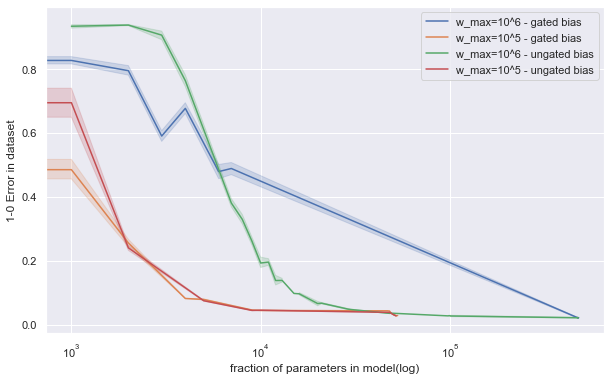

In [72]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

factor = [ 10**6, 10**5]
# factor = [ 1, 1 ]

for q_idx in data_means.keys():
    data = data_means[q_idx]
    sns.lineplot(np.array(data["n_params"]), data["bounds"], label=labels[q_idx])

ax.legend()
ax.set_xlabel('fraction of parameters in model(log)')
ax.set_ylabel('1-0 Error in dataset')
ax.set_xscale('log')
    
plt.savefig(os.path.join(tmp_directory, "loss_comparison_w_max.jpg"), dpi=700)